Please upload the 'Housing.csv' file


Saving Housing.csv to Housing (7).csv

Dataset Preview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.Da

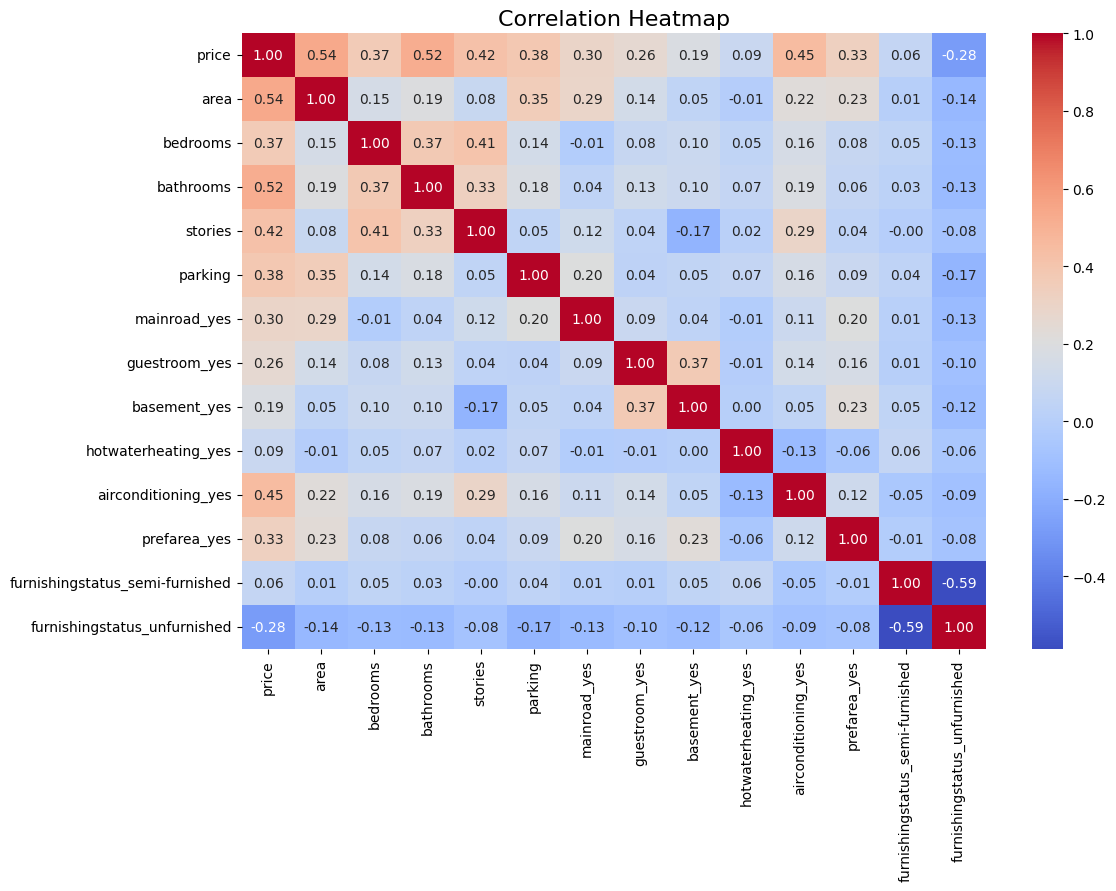

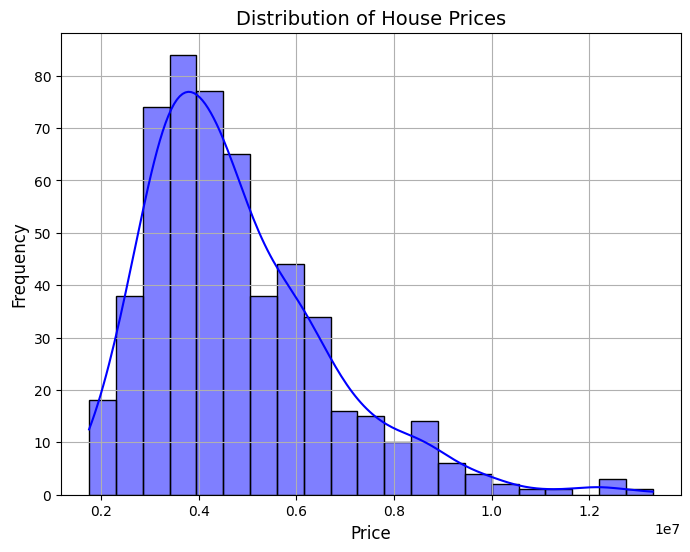


Model Evaluation:
Mean Squared Error: 1754318687330.66
R-squared: 0.65


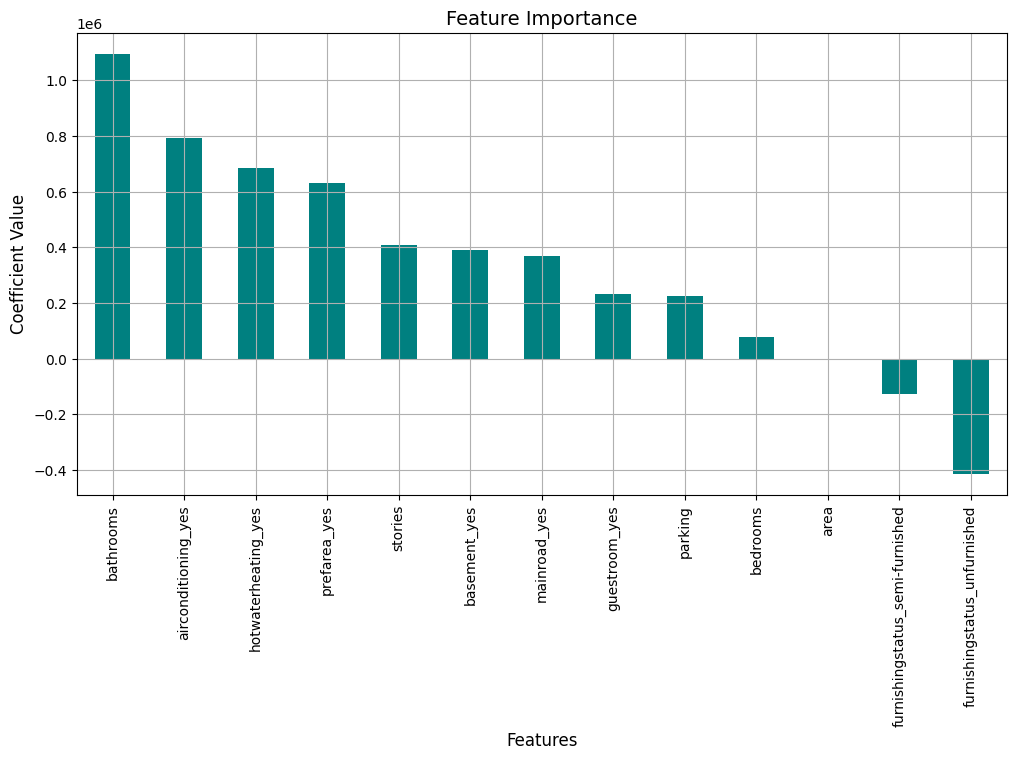

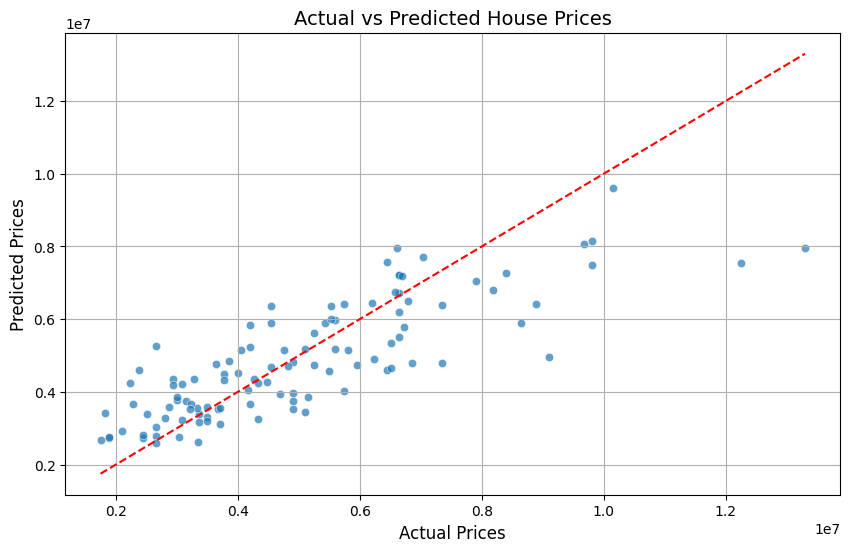

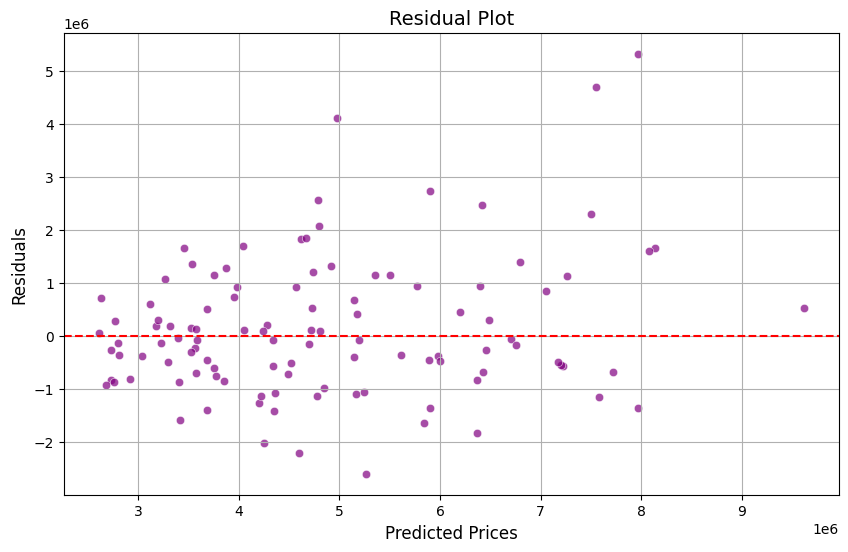

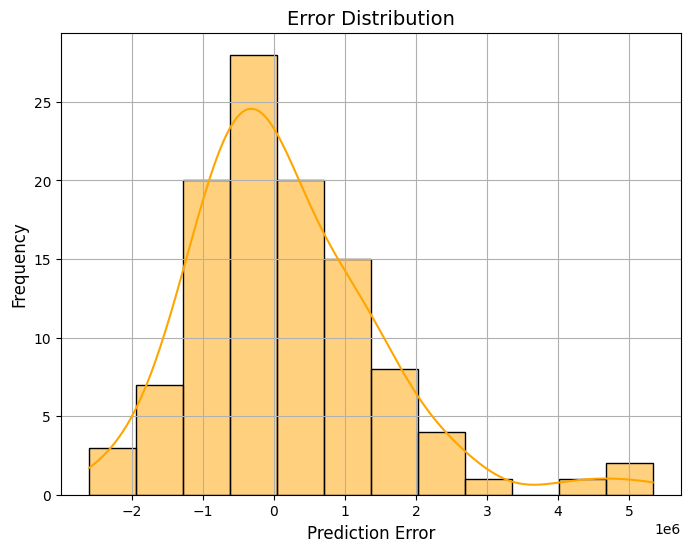

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

print("Please upload the 'Housing.csv' file")
uploaded = files.upload()

df = pd.read_csv("Housing.csv")

print("\nDataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df_numeric = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.title("Distribution of House Prices", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid()
plt.show()

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

plt.figure(figsize=(12, 6))
importance = pd.Series(model.coef_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Feature Importance", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted House Prices', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.grid()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot", fontsize=14)
plt.xlabel("Predicted Prices", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Error Distribution", fontsize=14)
plt.xlabel("Prediction Error", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid()
plt.show()